# Histogram and image transformations

In [2]:
import os,shutil,gzip
from glob import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
import matplotlib.image as mpimg

In [7]:
imagefilelist=glob("./*.jpg")
imagefilelist

['.\\image.jpg']

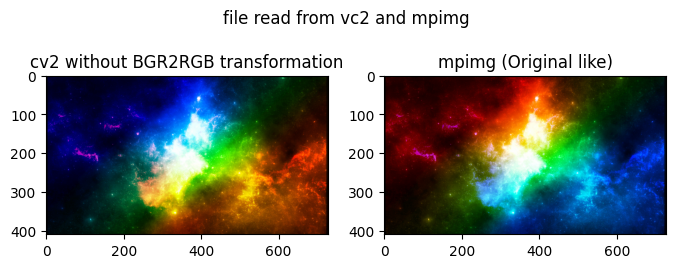

In [30]:
for file in imagefilelist:
    img = cv2.imread(file)
    # img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img2=mpimg.imread(file)
    fig,ax=plt.subplots(1,2,figsize=(8,3))
    ax[0].imshow(img)
    ax[0].set_title("cv2 without BGR2RGB transformation")
    ax[1].imshow(img2)
    ax[1].set_title("mpimg (Original like)")
    fig.suptitle("file read from vc2 and mpimg")

    plt.show()

((410, 728), 255, 0)

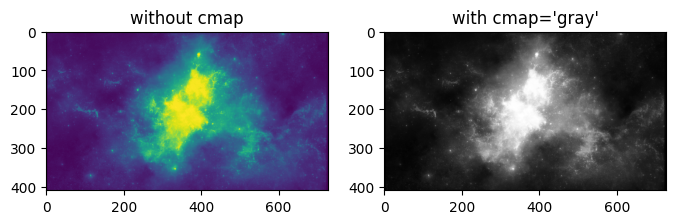

In [36]:
imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
fig,ax=plt.subplots(1,2,figsize=(8,3))
ax[0].imshow(imgGray)
ax[0].set_title("without cmap")
ax[1].imshow(imgGray,cmap="gray")
ax[1].set_title("with cmap='gray'")
imgGray.shape,imgGray.max(),imgGray.min()


reduce brightness by 150

((410, 728), -150, 105)

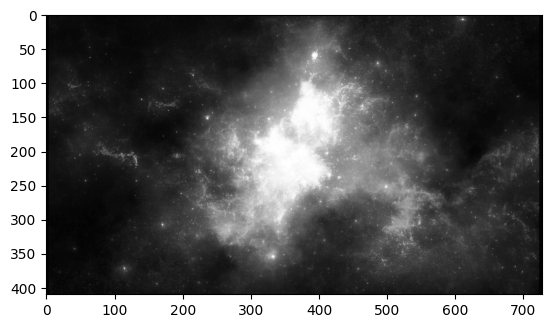

In [64]:
brightness=-150
imgGray.dtype
tf=imgGray+brightness
plt.imshow(tf,cmap="gray")
tf.shape,tf.min(),tf.max()



apply lower threshold

((410, 728), 0, 55)

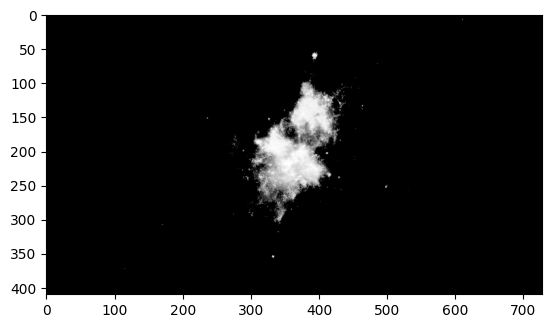

In [65]:
brightness=-200
imgGray.dtype
tf=imgGray+brightness
tf[tf<0]=0
tf[tf>245]=254
plt.imshow(tf,cmap="gray")
tf.shape,tf.min(),tf.max()



increasing brigntness and threshold but still bright areas are lost

((410, 728), 0, 254)

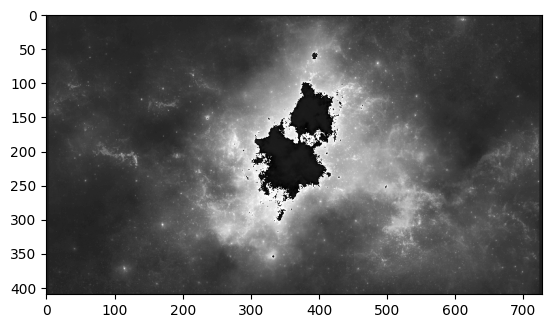

In [58]:
brightness=30
imgGray.dtype
tf=imgGray+brightness
tf[tf<0]=0
tf[tf>245]=254
plt.imshow(tf,cmap="gray")
tf.shape,tf.min(),tf.max()



If you check data type of image each image pixel is stored in 8 bits to increasing value above 255 will change them to start again from 0

In [66]:
imgGray.dtype

dtype('uint16')

here we change data type to 16 bits

((410, 728), 200, 254)

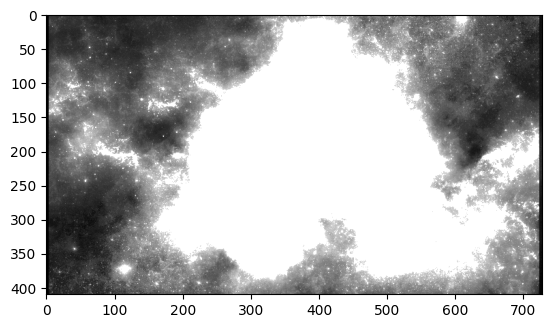

In [68]:
imgGray=imgGray.astype(np.uint16)
brightness=200
imgGray.dtype
tf=imgGray+brightness
tf[tf<0]=0
tf[tf>245]=254
plt.imshow(tf,cmap="gray")
tf.shape,tf.min(),tf.max()



Try to write code for changing contrast 

image flip

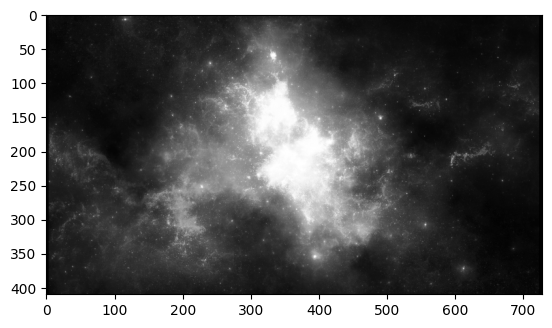

In [70]:
flipimage=np.zeros(imgGray.shape)
for i in range(imgGray.shape[0]):
    for j in range(imgGray.shape[1]):
        flipimage[i,j]=imgGray[i,imgGray.shape[1]-j-1]

plt.imshow(flipimage,cmap="gray")

invert image

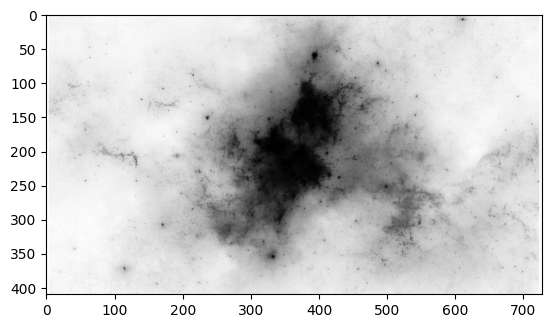

In [71]:
invertimage=255-imgGray
plt.imshow(invertimage,cmap="gray")

histogram

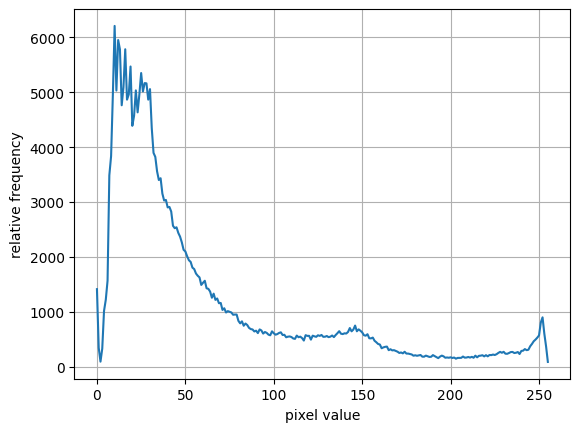

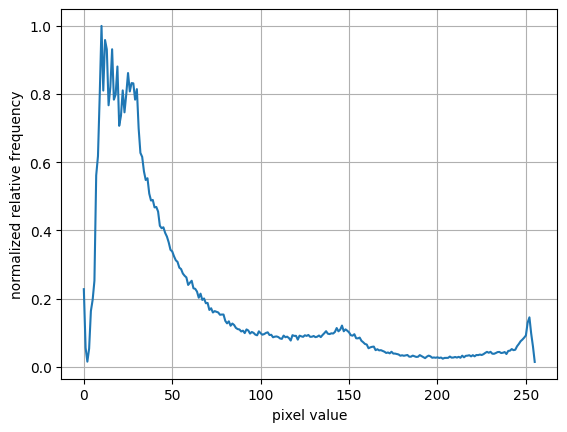

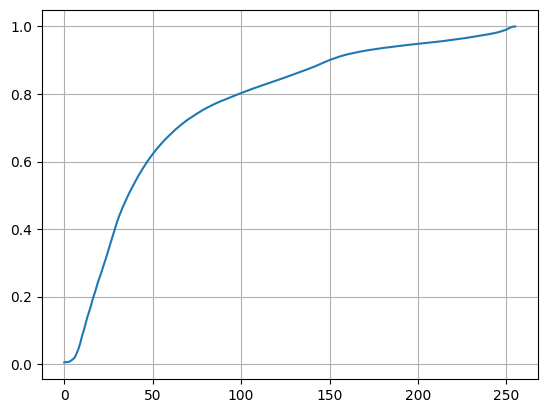

In [87]:
hist=np.zeros(256)
for i in range(imgGray.shape[0]):
    for j in range(imgGray.shape[1]):
        hist[imgGray[i,j]]+=1

plt.plot(hist)
plt.xlabel("pixel value")
plt.ylabel("relative frequency")
plt.grid(True)
plt.figure()
plt.plot(hist/hist.max())
plt.grid(True)

plt.xlabel("pixel value")
plt.ylabel("normalized relative frequency")
plt.figure()
plt.plot(hist.cumsum()/hist.sum())
plt.grid(True)

plt.xlabel("pixel value")
plt.ylabel("Cumelative relative frequency")